<a href="https://colab.research.google.com/github/subho2026/NLP-Beginners/blob/main/NLP_04_WE_word2vec_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# As usual we start with import

In [ ]:
import gensim
from nltk.data import find
import nltk
import numpy as np
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec


It appears that NLTK had word2vec stuff all time along

Sigh ...

In [ ]:
nltk.download('word2vec_sample')

[nltk_data] Downloading package word2vec_sample to /root/nltk_data...
[nltk_data]   Unzipping models/word2vec_sample.zip.


True

Let's load the pruned version (which has only most popular words)

In [ ]:
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

Total number of Words here

In [ ]:
len(model.vocab)

43981

In [ ]:
model.vocab.keys()

dict_keys(['fawn', 'deferment', 'Debts', 'Poetry', 'woods', 'clotted', 'hanging', 'hastily', 'comically', 'localized', 'spidery', 'disobeying', 'Adjusting', 'originality', 'Journey', 'mutinies', 'Western', 'alphabetic', 'Gravesend', 'Elec', 'slothful', 'wracked', 'Valle', 'Famed', 'stipulate', 'pigment', 'appropriation', 'rawhide', 'strictest', 'screaming', 'wooded', 'liaisons', 'broiler', 'wooden', 'Pergamon', 'Loeb', 'Sack', 'broiled', 'circuitry', 'deferments', 'resounds', 'Colonialism', 'gaskets', 'scrapes', 'precocity', 'Shocked', 'feasibility', 'miniatures', 'deadheads', 'mortgages', 'sustaining', 'consenting', 'Honorable', 'Pampa', 'scraped', 'snuggled', 'inanimate', 'errors', 'semicircular', 'tiered', 'Initially', 'cooking', 'Hamilton', 'outfielders', 'Niagara', 'hallucinating', 'succumb', 'shocks', 'crouch', 'chins', 'Foundation', 'jubilantly', 'zlotys', 'mailings', 'perforations', 'affiliates', 'perfunctorily', 'china', 'affiliated', 'Footnotes', 'confronts', 'doldrums', 'exi

Each word is represented by 300 features

In [ ]:
len(model['word'])

300

# Trying to make sense of word embeddings

In [ ]:
model['word']

array([ 1.33147e-01,  1.53771e-02,  3.34677e-02,  2.02616e-02,
       -5.46338e-02,  1.76384e-02, -3.14778e-02, -7.56190e-02,
        1.15057e-01, -3.91211e-03, -2.27942e-02, -5.75283e-02,
       -5.64429e-02,  3.16587e-02, -1.00403e-02,  1.42555e-01,
        1.77289e-02,  9.58806e-03,  1.66434e-02, -1.03479e-01,
        3.36939e-03,  1.51238e-01,  8.90061e-02, -1.13609e-01,
       -6.69355e-02,  1.75480e-02, -9.76896e-02,  3.36487e-02,
        5.10157e-02, -2.67120e-04,  9.90464e-03,  7.12773e-02,
       -8.50262e-03,  3.59552e-03, -2.73169e-02,  1.59198e-01,
       -2.93973e-03,  3.94377e-02,  1.04021e-02, -8.50262e-02,
       -7.10059e-03, -8.77398e-03,  1.30253e-02,  6.36792e-02,
       -4.16085e-02,  2.31561e-02, -6.29555e-02,  4.81212e-02,
       -5.71665e-02,  5.86138e-02, -2.87642e-02,  6.62119e-02,
       -6.40410e-02,  3.69050e-02,  1.46173e-01,  2.38797e-02,
       -2.53269e-02, -1.17951e-01,  2.20706e-02, -3.79904e-03,
        3.47341e-02,  3.05732e-02, -9.36192e-03,  4.070

In [ ]:
def plot_we_signle(word):
    fig = plt.figure(figsize = (15,5))
    plt.imshow(model[word].reshape(15,20), cmap = 'bwr', vmin = -0.15, vmax = 0.15)
    plt.title('Word2Vec representation of word: '+word)
    plt.colorbar();

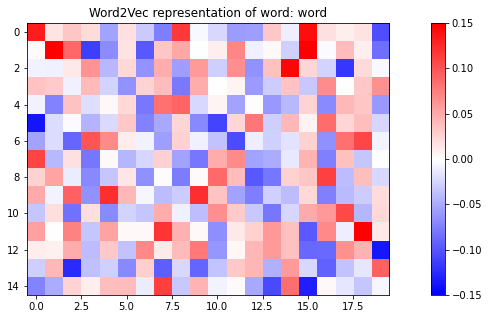

In [ ]:
plot_we_signle('word')

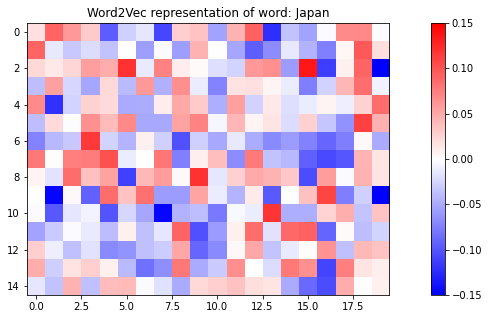

In [ ]:
plot_we_signle('Japan')

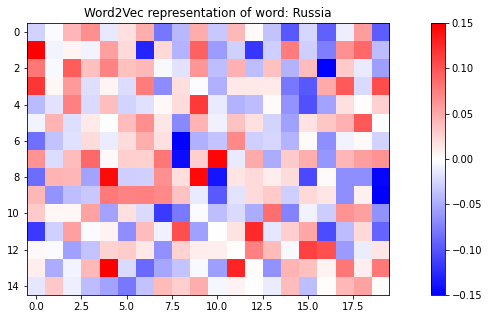

In [ ]:
plot_we_signle('Russia')

In [ ]:
def plot_we_multi(words):
    data = []
    for word in words:
        data.append(model[word])
    fig = plt.figure(figsize = (30,len(words)))
    plt.imshow(data,
               cmap = 'bwr', vmin = -0.15, vmax = 0.15,
               interpolation = None, aspect = 'auto')
    plt.title('Word2Vec representation of words')
    plt.grid()
    plt.yticks(np.arange(len(words)), words)
    plt.colorbar();

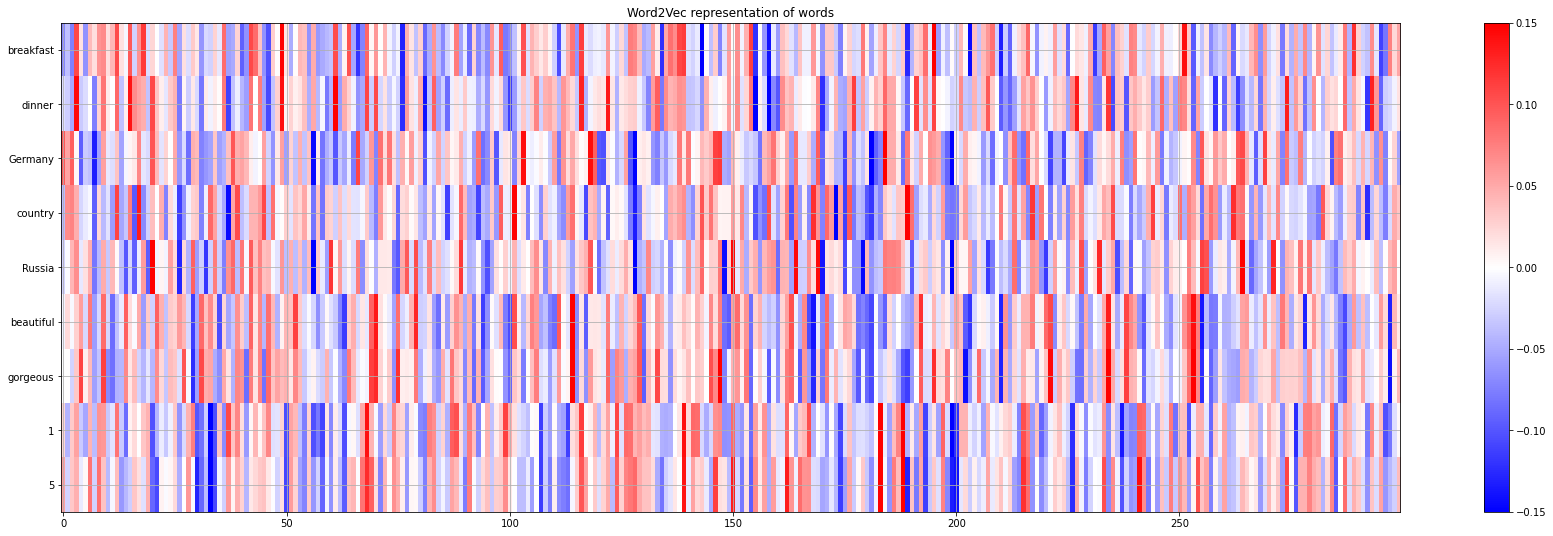

In [ ]:
words = ['breakfast', 'dinner', 'Germany', 'country', 'Russia','beautiful','gorgeous', '1', '5']
plot_we_multi(words)

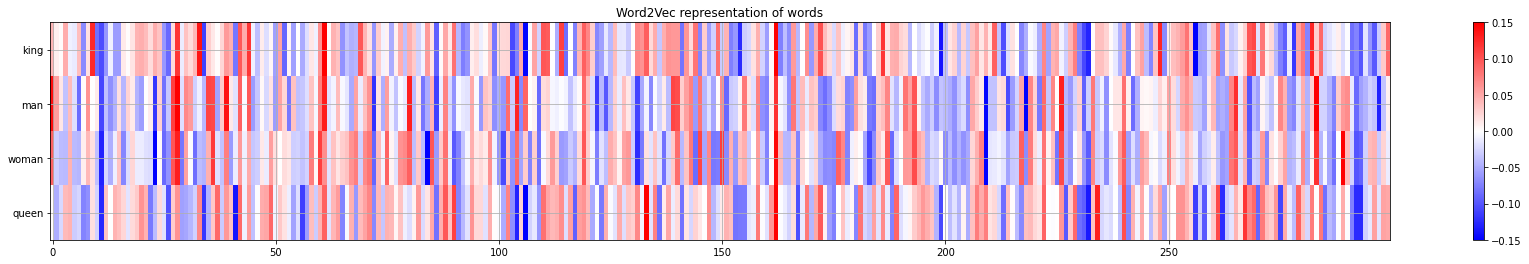

In [ ]:
words = ['king', 'man', 'woman', 'queen']
plot_we_multi(words)

In [ ]:
def plot_we_multi_alg(words):
    data = []
    for word in words:
        data.append(model[word])
    data.append(data[0]-data[1]+data[2])
    words.append(words[0]+'-'+words[1]+'+'+words[2])
    fig = plt.figure(figsize = (30,len(words)))
    plt.imshow(data,
               cmap = 'bwr', vmin = -.15, vmax = .15,
               interpolation = None, aspect = 'auto')
    plt.title('Word2Vec representation of words')
    plt.grid()
    plt.yticks(np.arange(len(words)), words)
    plt.colorbar();

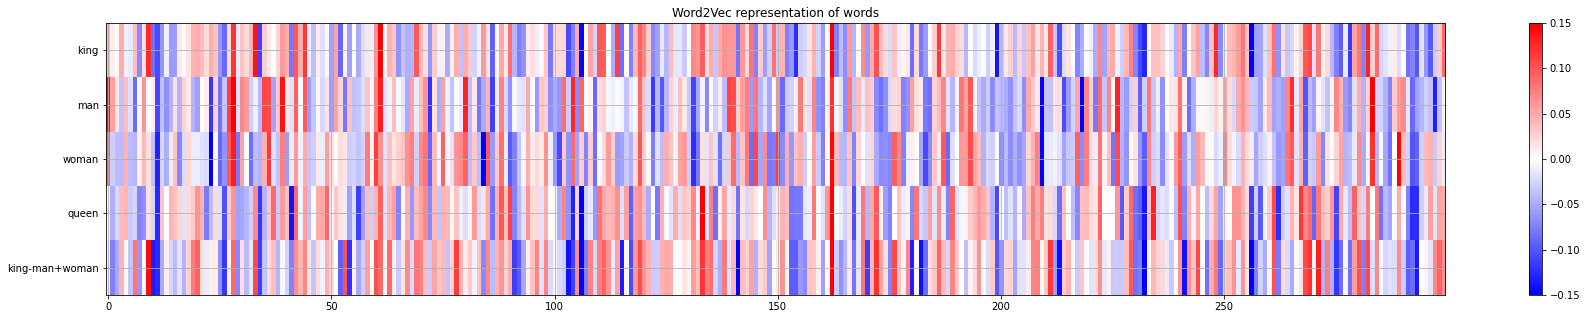

In [ ]:
words = ['king', 'man', 'woman', 'queen']
plot_we_multi_alg(words)

# Task

Plot different Parts of Speech, different topics
Try group them in Pairs (like two different countries and so on)

Visualize at least 15 WE


# Finding 'synonyms' using word2vec

In [ ]:
model.most_similar(positive=['university'], topn = 5)

[('universities', 0.7003918886184692),
 ('faculty', 0.6780906915664673),
 ('undergraduate', 0.6587096452713013),
 ('campus', 0.6434987783432007),
 ('college', 0.638526976108551)]

In [ ]:
model.most_similar(positive=['river'], topn = 5)

[('creek', 0.7994444370269775),
 ('lake', 0.7919586896896362),
 ('rivers', 0.7777560949325562),
 ('riverbank', 0.7283666133880615),
 ('River', 0.7170898914337158)]

In [ ]:
model.most_similar(positive=['table'], topn = 5)

[('tables', 0.695063591003418),
 ('tray', 0.4653455913066864),
 ('sideboard', 0.4434099793434143),
 ('Tables', 0.4419553279876709),
 ('napkin', 0.42967039346694946)]

In [ ]:
model.most_similar(positive=['tiger'], topn = 5)

[('elephant', 0.6681443452835083),
 ('elephants', 0.640099287033081),
 ('tigress', 0.5982027053833008),
 ('cheetah', 0.5816308259963989),
 ('lions', 0.5742771625518799)]

In [ ]:
model.most_similar(positive=['cat'], topn = 5)

[('cats', 0.8099379539489746),
 ('dog', 0.7609457969665527),
 ('kitten', 0.7464984059333801),
 ('feline', 0.7326231598854065),
 ('puppy', 0.707545280456543)]

# Playing 'what word is extra' game

In [ ]:
model.doesnt_match('breakfast cereal dinner lunch'.split())

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'cereal'

In [ ]:
model.doesnt_match('cat dog table tiger'.split())

'table'

# Our favourite linear algebra

Standard `queen = (king - man) + woman`

In [ ]:
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('queen', 0.7118192911148071),
 ('monarch', 0.6189673542976379),
 ('princess', 0.5902431011199951),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236842632293701)]

word2vec *knows* math

`4 + 5 - 3 = ?`

In [ ]:
model.most_similar(positive=['4', '5'], negative=['3'], topn=5)

[('6', 0.9177098274230957),
 ('8', 0.9096771478652954),
 ('7', 0.883624792098999),
 ('9', 0.8472416996955872),
 ('2', 0.819900393486023)]

In [ ]:
model.most_similar(positive=['2', '5'], negative=['3'], topn=5)

[('4', 0.9100943803787231),
 ('6', 0.900139570236206),
 ('1', 0.8842741250991821),
 ('8', 0.8796557188034058),
 ('7', 0.85642009973526)]

word2vec *knows* forms of adjective

`bad - worse + good = ?`

In [ ]:
model.most_similar(positive=['worse', 'good'], negative=['bad'], topn=5)

[('better', 0.735008955001831),
 ('stronger', 0.5315819978713989),
 ('nicer', 0.5277353525161743),
 ('happier', 0.527080774307251),
 ('decent', 0.5012362003326416)]

`worst - bad + good = ?`

In [ ]:
model.most_similar(positive=['worst', 'good'], negative=['bad'], topn=5)

[('best', 0.693242073059082),
 ('strongest', 0.6262710094451904),
 ('greatest', 0.5748810768127441),
 ('weakest', 0.5727126002311707),
 ('finest', 0.5371615886688232)]

word2vec *knows* tenses of verbs

`went - go + swim = ?`

In [ ]:
model.most_similar(positive=['went', 'swim'], negative=['go'], topn=5)

[('swam', 0.7314256429672241),
 ('swimming', 0.6467223167419434),
 ('swum', 0.5818623304367065),
 ('swimmers', 0.569441020488739),
 ('Swim', 0.5257592797279358)]

In [ ]:
model.most_similar(positive=['gone', 'swim'], negative=['go'], topn=5)

[('swum', 0.7135367393493652),
 ('swimming', 0.6843574643135071),
 ('swam', 0.6526592373847961),
 ('swimmers', 0.5992928147315979),
 ('Swim', 0.5154380202293396)]

word2vec *knows* georgaphy

`Moscow - Russia + Japan = ?`

In [ ]:
model.most_similar(positive=['Moscow', 'Japan'], negative=['Russia'], topn=5)

[('Tokyo', 0.8696038126945496),
 ('Osaka', 0.6701729893684387),
 ('Japanese', 0.6677039265632629),
 ('Seoul', 0.6629883050918579),
 ('Chiba', 0.6008852124214172)]

word2vec *knows* plural forms

In [ ]:
model.most_similar(positive=['king', 'queens'], negative=['kings'], topn=5)

[('queen', 0.7601928114891052),
 ('princess', 0.5552756786346436),
 ('monarch', 0.5157448649406433),
 ('prince', 0.46392661333084106),
 ('Queen', 0.442264586687088)]

# Task

Analyse other different cases of liniear algebra between words

Try different Parts of Speech, different topics

At least 10 different cases

# Let's do Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=4)

In [ ]:
X = []
for word in model.vocab.keys():
    X.append(model[word])

X = np.array(X)

In [ ]:
pca.fit(X)
pca_emb = pca.transform(X)

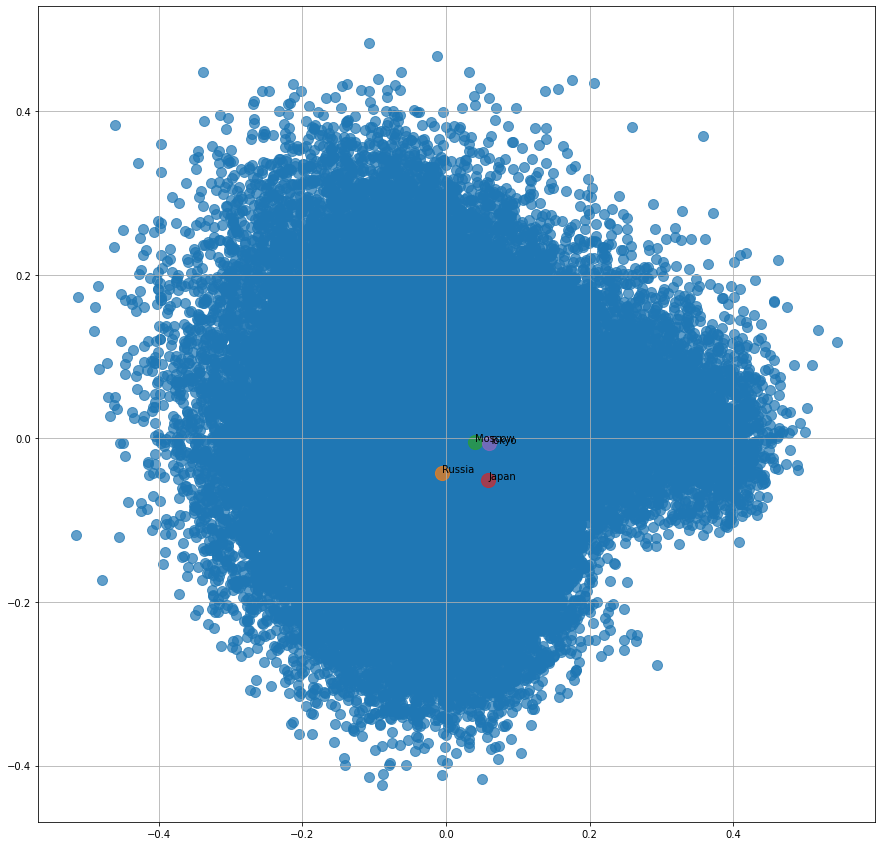

In [ ]:
fig = plt.figure(figsize = (15,15))
plt.scatter(pca_emb[:,0],pca_emb[:,1],
            alpha = 0.7, s = 100)

plt.scatter(pca_emb[17214,0],pca_emb[17214,1],
            alpha = 0.7, s = 200)
plt.text(pca_emb[17214,0],pca_emb[17214,1],
         list(model.vocab.keys())[17214])

plt.scatter(pca_emb[37584,0],pca_emb[37584,1],
            alpha = 0.7, s = 200)
plt.text(pca_emb[37584,0],pca_emb[37584,1],
         list(model.vocab.keys())[37584])

plt.scatter(pca_emb[8138,0],pca_emb[8138,1],
            alpha = 0.7, s = 200)
plt.text(pca_emb[8138,0],pca_emb[8138,1],
         list(model.vocab.keys())[8138])

plt.scatter(pca_emb[22375,0],pca_emb[22375,1],
            alpha = 0.7, s = 200)
plt.text(pca_emb[22375,0],pca_emb[22375,1],
         list(model.vocab.keys())[22375])

plt.grid();

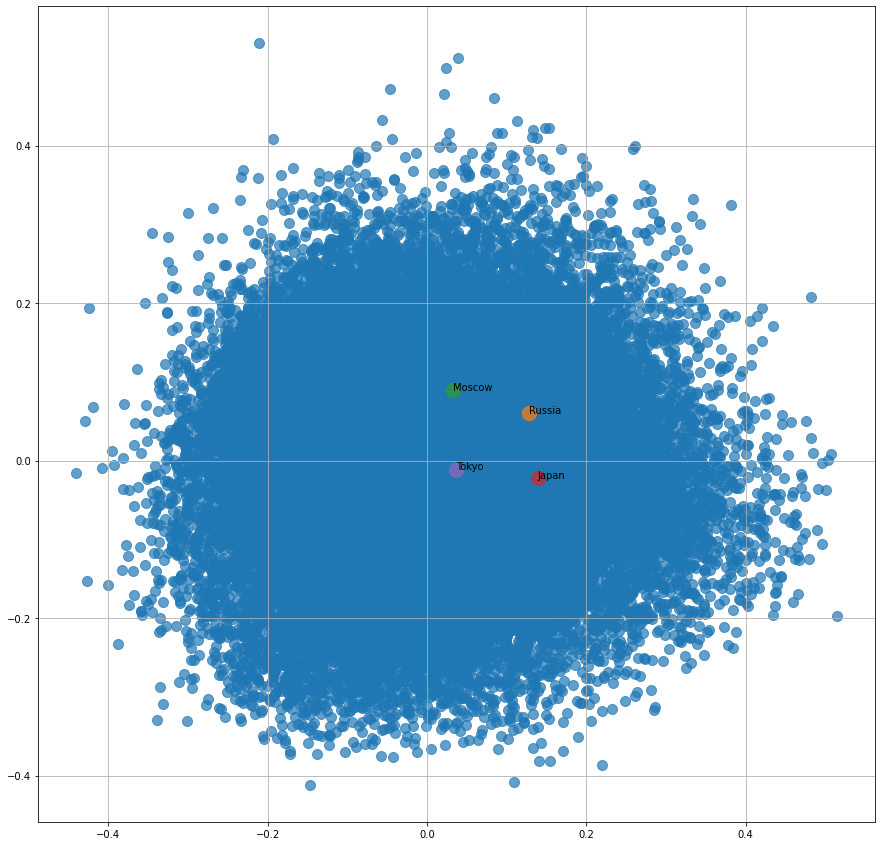

In [ ]:
fig = plt.figure(figsize = (15,15))
plt.scatter(pca_emb[:,2],pca_emb[:,3],
            alpha = 0.7, s = 100)

plt.scatter(pca_emb[17214,2],pca_emb[17214,3],
            alpha = 0.7, s = 200)
plt.text(pca_emb[17214,2],pca_emb[17214,3],
         list(model.vocab.keys())[17214])

plt.scatter(pca_emb[37584,2],pca_emb[37584,3],
            alpha = 0.7, s = 200)
plt.text(pca_emb[37584,2],pca_emb[37584,3],
         list(model.vocab.keys())[37584])

plt.scatter(pca_emb[8138,2],pca_emb[8138,3],
            alpha = 0.7, s = 200)
plt.text(pca_emb[8138,2],pca_emb[8138,3],
         list(model.vocab.keys())[8138])

plt.scatter(pca_emb[22375,2],pca_emb[22375,3],
            alpha = 0.7, s = 200)
plt.text(pca_emb[22375,2],pca_emb[22375,3],
         list(model.vocab.keys())[22375])

plt.grid();

In [ ]:
list(model.vocab.keys()).index('Japan')

8138

In [ ]:
list(model.vocab.keys())[8138]

'Japan'

# Task

write a function that visualizes different words on scatter plot

# Task

Use t-SNE as alternative visualization method